# Segmentation

Accordingly to wikipedia, segmentation `is the process of partitioning a digital image into multiple segments`.

Segmentation is usefull when you want to know the exacts boudaries of the object you want to select.
In a segmentation task, we assign to each pixel a label, and our goal is to find the best way to assign the best labels...

There is an example of image segmentation :

![image segmentation example](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/11/30071313/segmentation1.png)

Segmentation is an old problem in computer vision, also many different approaches exist. 
There are some of them :

- color (or texture) based 
- region based 
- conditionnal random filed based
- graph methods based
- neural network based
- etc.

In this notebok we will look at the simplest form of segmentation : the color based segmentation.

Segmentation is a though task because it's not very well defined (each approach has a different definition).
Further more, segmentation depend on the level of granurality you want, as we can see bellow : 

![segmentation granullarity](./imgs/segmentation_granularity.png)

## Libraries

In [1]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
from matplotlib import gridspec

from skimage import io
from skimage import color
from skimage import filters
from skimage import feature
from skimage import data

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Color Based Segmentation

For this example we want to segment regions of the image based on the color. 
To solve this we will have to do vector quantization (its like lossly compression, several colors will take the same value).
This can be done with clustering methods, like K-Means or MeanShift.

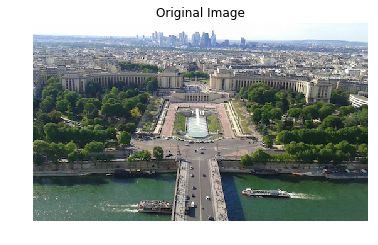

In [2]:
img = io.imread("imgs/paris.png")

plt.title("Original Image")
plt.axis("off")
plt.imshow(img)
plt.show()

In [3]:
#get all pixels values
pixels_values = list(zip(img[:, :, 0].flatten(), img[:, :, 1].flatten(), img[:, :, 2].flatten()))

In [4]:
clst = KMeans(4)
segmentation_pixels_values = clst.fit_predict(pixels_values)

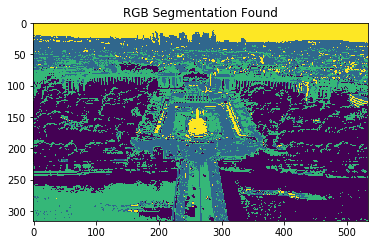

what do you think about this segmentation ? how could you improve it ?


In [5]:
plt.title("RGB Segmentation Found")
plt.imshow(segmentation_pixels_values.reshape((img.shape[0], img.shape[1])))
plt.show()

print("what do you think about this segmentation ? how could you improve it ?")

## Application: Shadow Removal

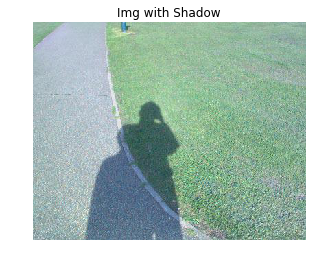

In [6]:
img = io.imread("imgs/shadows/1.jpg")
hsv_img = color.rgb2hsv(img)

plt.title("Img with Shadow")
plt.axis("off")
plt.imshow(img)
plt.show()

In [7]:
h = hsv_img[:, :, 0].flatten()
s = hsv_img[:, :, 1].flatten()
v = hsv_img[:, :, 2].flatten()

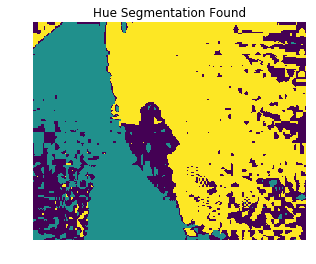

This channel is the hue/color channel... the number of cluster seem to be to high...


In [8]:
clst = KMeans(3)
h_segmentation_pixels_values = clst.fit_predict(np.array([h.flatten()]).T)

plt.title("Hue Segmentation Found")
plt.axis("off")
plt.imshow(h_segmentation_pixels_values.reshape((hsv_img.shape[0], hsv_img.shape[1])))
plt.show()

print("This channel is the hue/color channel... the number of cluster seem to be to high...")

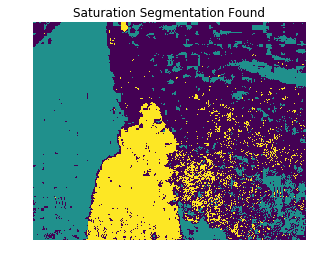

This channel seem to localize the shaddow... the number of clusters seems not too bad...


In [9]:
clst = KMeans(3)
s_segmentation_pixels_values = clst.fit_predict(np.array([s.flatten()]).T)

plt.title("Saturation Segmentation Found")
plt.axis("off")
plt.imshow(s_segmentation_pixels_values.reshape((hsv_img.shape[0], hsv_img.shape[1])))
plt.show()

print("This channel seem to localize the shaddow... the number of clusters seems not too bad...")

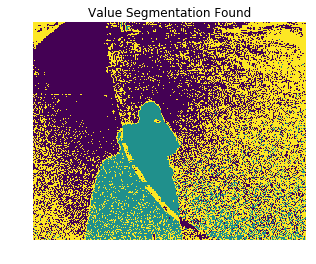

This channel doesn't look really interresting...


In [10]:
clst = KMeans(3)
v_segmentation_pixels_values = clst.fit_predict(np.array([v.flatten()]).T)

plt.title("Value Segmentation Found")
plt.axis("off")
plt.imshow(v_segmentation_pixels_values.reshape((hsv_img.shape[0], hsv_img.shape[1])))
plt.show()

print("This channel doesn't look really interresting...")

In our case we only have _2_ main colors, we will set our cluster numbers at _k = 2_ for the _Hue_ channel...

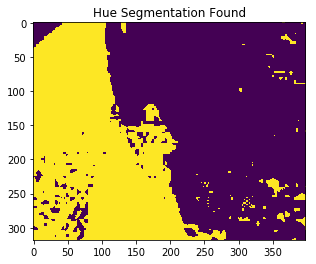

In [11]:
clst = KMeans(2)
h_segmentation_pixels_values = clst.fit_predict(np.array([h.flatten()]).T)

plt.title("Hue Segmentation Found")
plt.imshow(h_segmentation_pixels_values.reshape((hsv_img.shape[0], hsv_img.shape[1])))
plt.show()

Let's find the median saturation of the 2 main colors...

In [12]:
cluster_0_median_staturation = np.median(s[np.where(h_segmentation_pixels_values == 0)])
cluster_1_median_staturation = np.median(s[np.where(h_segmentation_pixels_values == 1)])

cluster_0_median_value = np.median(v[np.where(h_segmentation_pixels_values == 0)])
cluster_1_median_value = np.median(v[np.where(h_segmentation_pixels_values == 1)])

Let's find by hand the id of the shadow (when running this cell you will maby need to vary the cluster id)...

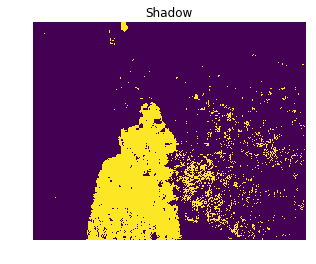

In [14]:
shadow_cluster_id = 2 #change to find the right one...

plt.title("Shadow")
plt.axis("off")
plt.imshow((s_segmentation_pixels_values == shadow_cluster_id).reshape(hsv_img.shape[0], hsv_img.shape[1]))
plt.show()

In [15]:
sc0 = set(
    list(np.where(s_segmentation_pixels_values == shadow_cluster_id)[0]) #the shadow
).intersection(
    list(np.where(h_segmentation_pixels_values == 0)[0])                 #one part of the color
)

for val in sc0:
    s[val] = cluster_0_median_staturation
    v[val] = cluster_0_median_value

In [16]:
sc1 = set(
    list(np.where(s_segmentation_pixels_values == shadow_cluster_id)[0]) #the shadow
).intersection(
    list(np.where(h_segmentation_pixels_values == 1)[0])                 #other part of the color
)

for val in sc1:
    s[val] = cluster_1_median_staturation
    v[val] = cluster_1_median_value

In [17]:
new_hsv_img = np.zeros(hsv_img.shape)

for i in range(new_hsv_img.shape[0]):
    for j in range(new_hsv_img.shape[1]):
        new_hsv_img[i, j, 0] = h[i * new_hsv_img.shape[1] + j]
        new_hsv_img[i, j, 1] = s[i * new_hsv_img.shape[1] + j]
        new_hsv_img[i, j, 2] = v[i * new_hsv_img.shape[1] + j]

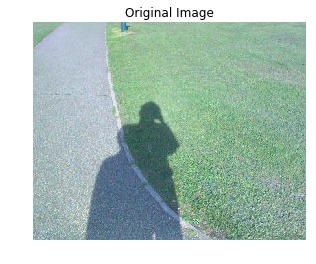

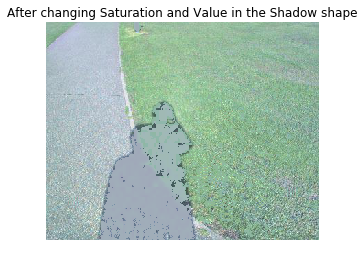

In [18]:
new_img = color.hsv2rgb(new_hsv_img)


plt.title("Original Image")
plt.axis("off")
plt.imshow(img)
plt.show()

plt.title("After changing Saturation and Value in the Shadow shape")
plt.axis("off")
plt.imshow(new_img)
plt.show()

The result is not Whaou because we see that the texture is not preserved...

But we saw how with an appropriate color space and somes ideas, segmentation can be usefull in some case like this one !

**Exercice**: _look on internet different algorithms of segmentation, look at the skimage documentation about the different segmtation algorithms, took one of them and try to fing the best segmentation on the following picture..._
    
![picture to segment](./imgs/blanche_neige.png)

- path of the picture : `./imgs/blanche_neige.png``


Good luck ! 😃